<a href="https://colab.research.google.com/github/Saaj369/Double-Pendulum/blob/main/NMP_Double_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

In [ ]:
# First order differentials
class NumSolve():
    def __init__(self,diff_eqn,initial,range_,step):
        self.diff_eqn = diff_eqn
        self.y0 = initial
        self.range = range_
        self.step = step
        self.h = (range_[1]-range_[0])/step

    def SaveData(self,rows,method_name):
        fields = ('xn','yn')
        file_name = f'{method_name}'+'_data.csv'
        with open(file_name, 'w',newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(fields)
            # csvwriter.writerows(rows)
            for row in rows:
                csvwriter.writerow(row)

    def RK4(self):
        rows = [[self.range[0],self.y0]]
        for i in range(0,self.step+1):
            xi = rows[i][0]
            yi = rows[i][1]
            r1 = self.diff_eqn(xi,yi)
            r2 = self.diff_eqn(xi+self.h/2, yi+self.h*r1/2)
            r3 = self.diff_eqn(xi+self.h/2,yi+self.h*r2/2)
            r4 = self.diff_eqn(xi+self.h,yi+self.h*r3)
            yi1 = yi+self.h*(r1+2*r2+2*r3+r4)/6
            xi1 = xi + self.h
            rows.append([xi1,yi1])
        self.SaveData(rows,'RK4')
        print(len(rows))
        print(rows)

In [ ]:
def visualize(filename):
    import pandas as pd
    import matplotlib.pyplot as plt
    data = pd.read_csv(filename)
    x = data['xn']
    y = data['yn']

    plt.figure()
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('RK4')
    plt.show()



In [ ]:
def eqn(x,y):
    return x

obj1 = NumSolve(eqn,0,(0,100),1000)

In [ ]:
obj1.RK4()

1002
[[0, 0], [0.1, 0.005000000000000001], [0.2, 0.020000000000000004], [0.30000000000000004, 0.04500000000000001], [0.4, 0.08000000000000002], [0.5, 0.12500000000000003], [0.6, 0.18000000000000005], [0.7, 0.24500000000000005], [0.7999999999999999, 0.32000000000000006], [0.8999999999999999, 0.4050000000000001], [0.9999999999999999, 0.5000000000000001], [1.0999999999999999, 0.6050000000000001], [1.2, 0.7200000000000001], [1.3, 0.8450000000000001], [1.4000000000000001, 0.9800000000000001], [1.5000000000000002, 1.125], [1.6000000000000003, 1.28], [1.7000000000000004, 1.445], [1.8000000000000005, 1.62], [1.9000000000000006, 1.8050000000000002], [2.0000000000000004, 2.0], [2.1000000000000005, 2.205], [2.2000000000000006, 2.42], [2.3000000000000007, 2.645], [2.400000000000001, 2.88], [2.500000000000001, 3.125], [2.600000000000001, 3.38], [2.700000000000001, 3.645], [2.800000000000001, 3.92], [2.9000000000000012, 4.205], [3.0000000000000013, 4.5], [3.1000000000000014, 4.805], [3.2000000000000

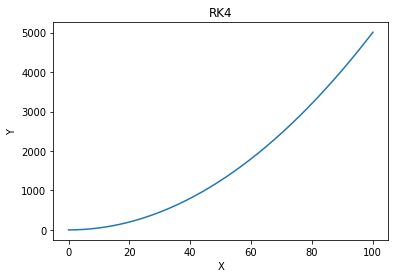

In [ ]:
visualize('RK4_data.csv')

[ 0.8417105  -1.54155497  0.3320408   0.65474929]


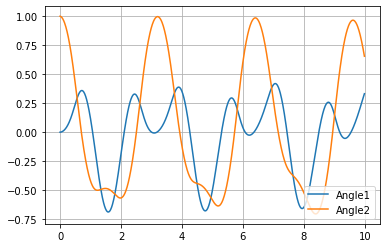

In [ ]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from math import cos, sin, pi


def G(y,t):
	a1d, a2d = y[0], y[1]
	a1, a2 = y[2], y[3]

	m11, m12 = (m1+m2)*l1, m2*l2*cos(a1-a2)
	m21, m22 = l1*cos(a1-a2), l2
	m = np.array([[m11, m12],[m21, m22]])

	f1 = -m2*l2*a2d*a2d*sin(a1-a2) - (m1+m2)*g*sin(a1)
	f2 = l1*a1d*a1d*sin(a1-a2) - g*sin(a2)
	f = np.array([f1, f2])

	accel = inv(m).dot(f)

	return np.array([accel[0], accel[1], a1d, a2d])


def RK4_step(y, t, dt):
	k1 = G(y,t)
	k2 = G(y+0.5*k1*dt, t+0.5*dt)
	k3 = G(y+0.5*k2*dt, t+0.5*dt)
	k4 = G(y+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

# variables
m1, m2 = 2.0, 1.0
l1, l2 = 1.0, 2.0
g = 9.81

delta_t = 0.01
time = np.arange(0.0, 10.0, delta_t)

# initial state
y = np.array([0,0,0,1.0])   # [velocity, displacement]

Y1 = []
Y2 = []

# time-step solution
for t in time:
	y = y + RK4_step(y, t, delta_t)

	Y1.append(y[2])
	Y2.append(y[3])
print(y)


# plot the result
plt.plot(time,Y1)
plt.plot(time,Y2)
plt.grid(True)
plt.legend(['Angle1', 'Angle2'], loc='lower right')
plt.show()

[ 0.03799538  0.05036161 -0.07855275 -0.15384097]


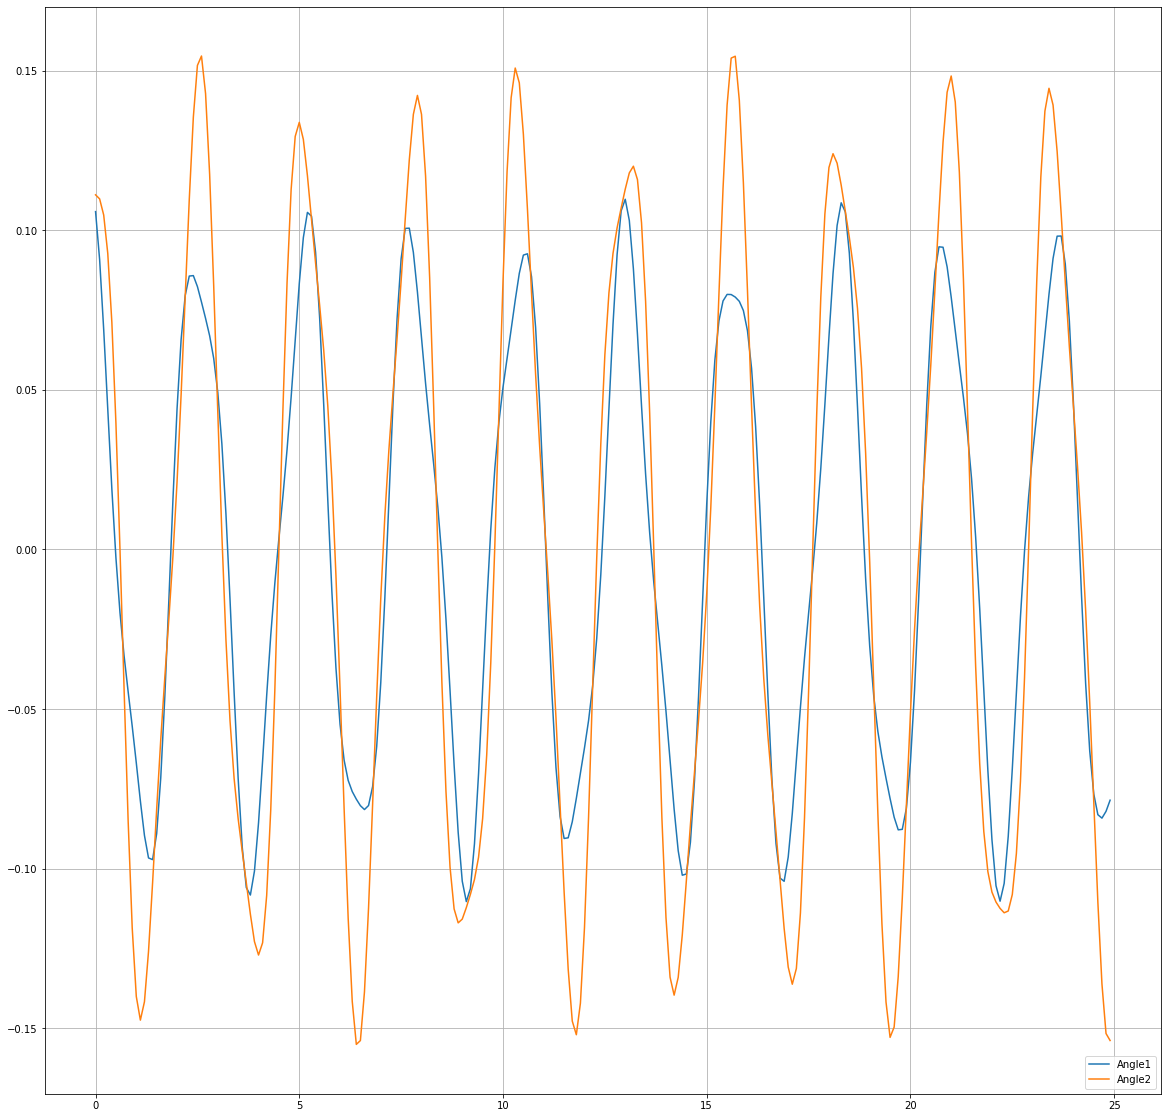

In [ ]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
from math import cos, sin, pi

system = {
    'm1':1,
    'm2':1,
    'l1':1,
    'l2':1,
    'g':9.8
}
for key, value in system.items():
    globals()[key] = value

def G(y,t):
	a1d, a2d = y[0], y[1]
	a1, a2 = y[2], y[3]

	m11, m12 = (m1+m2)*l1, m2*l2*cos(a1-a2)
	m21, m22 = l1*cos(a1-a2), l2
	m = np.array([[m11, m12],[m21, m22]])

	f1 = -m2*l2*a2d*a2d*sin(a1-a2) - (m1+m2)*g*sin(a1)
	f2 = l1*a1d*a1d*sin(a1-a2) - g*sin(a2)
	f = np.array([f1, f2])

	accel = inv(m).dot(f)

	return np.array([accel[0], accel[1], a1d, a2d])


def RK4_step(y, t, dt):
	k1 = G(y,t)
	k2 = G(y+0.5*k1*dt, t+0.5*dt)
	k3 = G(y+0.5*k2*dt, t+0.5*dt)
	k4 = G(y+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6


delta_t = 0.1
time = np.arange(0.0, 25.0, delta_t)

# initial state
y = np.array([0,0,np.deg2rad(6.37),np.deg2rad(6.37)])   # [velocity, displacement]

Y1 = []
Y2 = []
Y1d = []
Y2d = []

# time-stepping solution
for t in time:
	y = y + RK4_step(y, t, delta_t)

	Y1d.append(y[0])
	Y2d.append(y[1])
	Y1.append(y[2])
	Y2.append(y[3])

print(y)


# plot the result
plt.figure(figsize=(20,20))
plt.plot(time,Y1)
plt.plot(time,Y2)
# plt.plot(time,Y1d)
# plt.plot(time,Y2d)
plt.grid(True)
plt.legend(['Angle1', 'Angle2'], loc='lower right')
plt.show()




In [ ]:
def saveData(y1,y2,y1d,y2d,t):
    fields = ('t','a1','a2','a1dot','a2dot')
    file_name = 'rk4_data.csv'
    rows = np.transpose(np.array([t,y1,y2,y1d,y2d]))
    with open(file_name, 'w',newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(fields)
        # csvwriter.writerows(rows)
        for row in rows:
            csvwriter.writerow(row)

In [ ]:
saveData(Y1,Y2,Y1d,Y2d,time)

In [ ]:
def visualize():
    import pandas as pd
    import matplotlib.pyplot as plt
    data = pd.read_csv('rk4_data.csv')
    t = data['t']
    a1 = data['a1']
    a2 = data['a2']
    a1dot = data['a1dot']
    a2dot = data['a2dot']

    plt.figure(figsize=(15,15))
    plt.plot(t,a1)
    plt.plot(t,a2)
    plt.xlabel('t')
    plt.ylabel('angle')
    plt.title('RK4')
    plt.show()

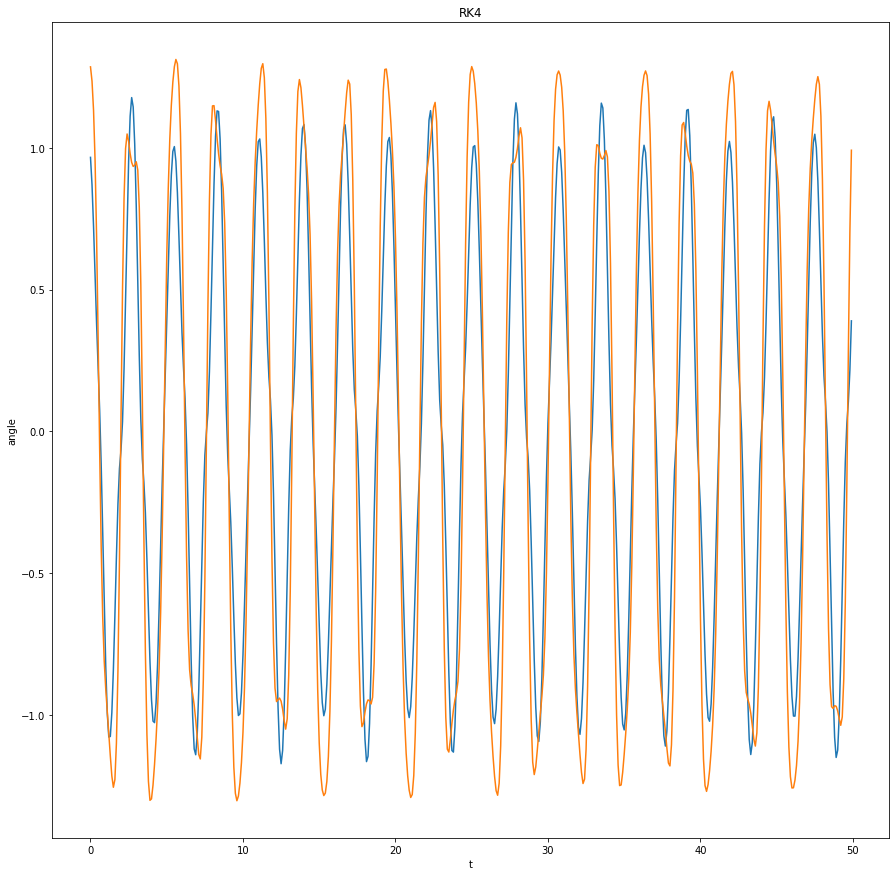

In [ ]:
visualize()

In [ ]:
import pygame
import sys
from pygame.locals import *
from math import sin, cos, pi
import numpy as np
from numpy.linalg import inv

def G(y,t):
	a1d, a2d = y[0], y[1]
	a1, a2 = y[2], y[3]

	m11, m12 = (m1+m2)*l1, m2*l2*cos(a1-a2)
	m21, m22 = l1*cos(a1-a2), l2
	m = np.array([[m11, m12],[m21, m22]])

	f1 = -m2*l2*a2d*a2d*sin(a1-a2) - (m1+m2)*g*sin(a1)
	f2 = l1*a1d*a1d*sin(a1-a2) - g*sin(a2)
	f = np.array([f1, f2])

	accel = inv(m).dot(f)

	return np.array([accel[0], accel[1], a1d, a2d])

def RK4_step(y, t, dt):
	k1 = G(y,t)
	k2 = G(y+0.5*k1*dt, t+0.5*dt)
	k3 = G(y+0.5*k2*dt, t+0.5*dt)
	k4 = G(y+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

def update(a1, a2):
	scale = 100
	x1 = l1*scale * sin(a1) + offset[0]
	y1 = l1*scale * cos(a1) + offset[1]
	x2 = x1 + l2*scale * sin(a2)
	y2 = y1 + l2*scale * cos(a2)

	return (x1, y1), (x2, y2)

def render(point1, point2):
	scale = 10
	x1, y1,  = int(point1[0]), int(point1[1])
	x2, y2,  = int(point2[0]), int(point2[1])

	if prev_point:
		xp, yp = prev_point[0], prev_point[1]
		pygame.draw.line(trace, LT_BLUE, (xp, yp), (x2, y2), 3)

	screen.fill(WHITE)
	screen.blit(trace, (0,0))

	pygame.draw.line(screen, BLACK, offset, (x1,y1), 5)
	pygame.draw.line(screen, BLACK, (x1,y1), (x2,y2), 5)
	pygame.draw.circle(screen, BLACK, offset, 8)
	pygame.draw.circle(screen, RED, (x1, y1), int(m1*scale))
	pygame.draw.circle(screen, BLUE, (x2, y2), int(m2*scale))

	return (x2, y2)

w, h = 800, 480
WHITE = (255,255,255)
BLACK = (0,0,0)
RED = (255,0,0)
BLUE = (0,0,255)
LT_BLUE = (230,230,255)
offset = (400, 50)

screen = pygame.display.set_mode((w,h))
screen.fill(WHITE)
trace = screen.copy()
pygame.display.update()
clock = pygame.time.Clock()

# parameters
m1, m2 = 3.0, 2.0
l1, l2 = 1.5, 2.0
a1, a2 = pi/4, -1.0
g = 9.81

prev_point = None
t = 0.0
delta_t = 0.02
y = np.array([0.0, 0.0, 2.0, 0.5])

pygame.font.init()
myfont = pygame.font.SysFont('Comic Sans MS', 38)

while True:
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			sys.exit()

	point1, point2 = update(y[2], y[3])
	prev_point = render(point1, point2)

	time_string = 'Time: {} seconds'.format(round(t,1))
	text = myfont.render(time_string, False, (0, 0, 0))
	screen.blit(text, (10,10))

	t += delta_t
	y = y + RK4_step(y, t, delta_t)

	clock.tick(60)
	pygame.display.update()


pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\sajan\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('rk4_data.csv')
t = data['t']
y1 = data['a1']
y3 = data['a2']
y2 = data['a1dot']
y4 = data['a2dot']
data.head(10)

,t,a1,a2,a1dot,a2dot
0,0.0,1.521791,0.001200,-0.980526,0.048027
1,0.1,1.374222,0.019251,-1.979042,0.386257
2,0.2,1.121669,0.098879,-3.122677,1.346798
3,0.3,0.729716,0.327449,-4.832562,3.398275
4,0.4,0.208393,0.690635,-5.088728,3.046305
5,0.5,-0.241153,0.847011,-3.993110,0.171578
6,0.6,-0.600135,0.748863,-3.164554,-2.022212
7,0.7,-0.860172,0.466207,-1.950268,-3.517588
8,0.8,-0.972661,0.061885,-0.219896,-4.553056
9,0.9,-0.885985,-0.460978,2.023661,-6.046368


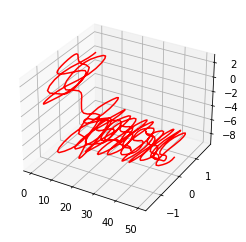

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(t,y1, y3, 'red')

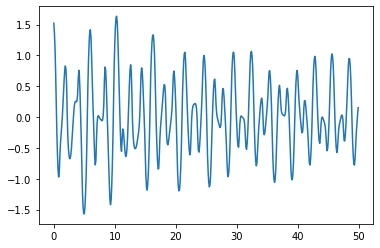

In [ ]:
plt.plot(t,y1)

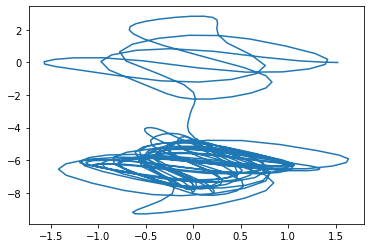

In [ ]:
plt.plot(y1,y3)

In [ ]:
x_1=[]
y_1=[]
x_2=[]
y_2=[]
t
for i in range(len(y1)):
    px1=l1*sin(y1[i])
    py1=-l1*cos(y1[i])
    px2=l1*sin(y1[i])+l2*sin(y3[i])
    py2=-(l1*cos(y1[i])+l2*cos(y3[i]))
    x_1=np.append(x_1,px1)
    y_1=np.append(y_1,py1)
    x_2=np.append(x_2,px2)
    y_2=np.append(y_2,py2)

In [ ]:
x_1,y_1,x_2,y_2

(array([ 0.82263749,  0.76360179,  0.66140102,  0.52282174,  0.36958774,
         0.22419438,  0.07504636, -0.11427258, -0.34256272, -0.56577151,
        -0.73675136, -0.83801796, -0.88087448, -0.87982669, -0.83698214,
        -0.74572638, -0.60449013, -0.42814263, -0.25346004, -0.13037312,
        -0.06621381,  0.0337953 ,  0.21939153,  0.44804316,  0.66112221,
         0.81462889,  0.8962561 ,  0.9233681 ,  0.91025625,  0.84854702,
         0.71457589,  0.50509596,  0.26046814,  0.04239958, -0.09791314,
        -0.17749141, -0.28327561, -0.43566335, -0.59453283, -0.72453573,
        -0.81064454, -0.85292049, -0.85567705, -0.81766482, -0.72990888,
        -0.58531547, -0.39396689, -0.18557912,  0.01155046,  0.19508942,
         0.37640078,  0.548468  ,  0.6895076 ,  0.78493675,  0.83438735,
         0.84365344,  0.81499175,  0.74526997,  0.63290921,  0.48854269,
         0.3408039 ,  0.22202435,  0.11545296, -0.04482878, -0.27144429,
        -0.5162912 , -0.71848332, -0.84360136, -0.8

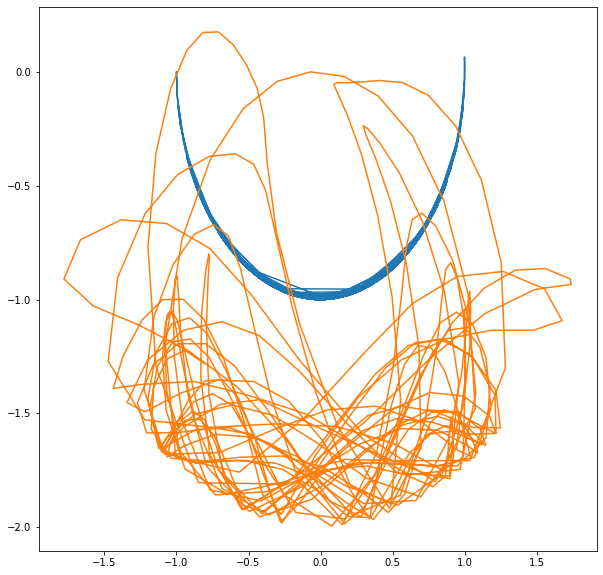

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x_1,y_1)
plt.plot(x_2,y_2)

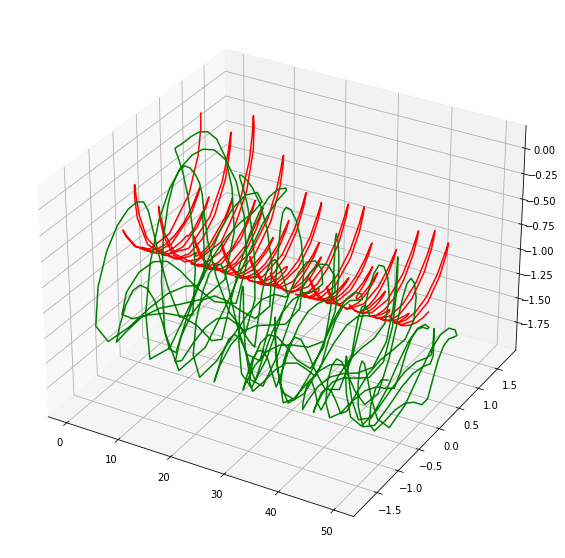

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(t,x_1,y_1, 'red')
ax.plot3D(t,x_2,y_2, 'green')

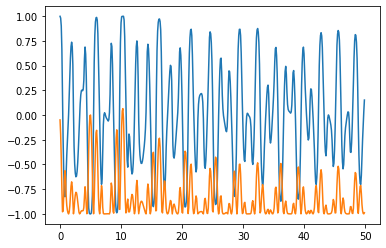

In [ ]:
plt.plot(t,x_1)
plt.plot(t,y_1)